# Coffee Sales Analysis

This notebook analyzes daily coffee shop sales using a small CSV dataset. We will perform exploratory data analysis (EDA), statistical testing, and create visualizations to gain insights into sales patterns.

In [3]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set plot style
sns.set(style="whitegrid")

## Load and Preview the Dataset

Load the CSV file containing daily coffee shop sales and display the first few rows.

In [4]:
# Load the dataset
sales_df = pd.read_csv('coffee_sales.csv', parse_dates=['date'])
sales_df.head()

,date,product,price,quantity
0,2025-07-15,Espresso,2.5,30
1,2025-07-15,Cappuccino,3.0,25
2,2025-07-15,Latte,3.5,20
3,2025-07-16,Espresso,2.5,28
4,2025-07-16,Cappuccino,3.0,30


## Basic Data Cleaning

Check for missing values, correct data types, and handle any inconsistencies in the dataset.

In [5]:
# Check for missing values and data types
print("Missing values per column:\n", sales_df.isnull().sum())
print("\nData types:\n", sales_df.dtypes)

# Show summary statistics
sales_df.describe()

Missing values per column:
 date        0
product     0
price       0
quantity    0
dtype: int64

Data types:
 date        datetime64[ns]
product             object
price              float64
quantity             int64
dtype: object


,date,price,quantity
count,48,48.000000,48.000000
mean,2025-07-22 12:00:00,3.000000,30.458333
min,2025-07-15 00:00:00,2.500000,18.000000
25%,2025-07-18 18:00:00,2.500000,25.750000
50%,2025-07-22 12:00:00,3.000000,30.000000
75%,2025-07-26 06:00:00,3.500000,35.000000
max,2025-07-30 00:00:00,3.500000,47.000000
std,NaN,0.412568,6.760204


## Calculate Average Sales Per Day

Compute the average daily sales from the dataset.

In [6]:
# Calculate total sales per day
sales_df['total_sales'] = sales_df['price'] * sales_df['quantity']
daily_sales = sales_df.groupby('date')['total_sales'].sum()

# Compute average daily sales
avg_daily_sales = daily_sales.mean()
print(f"Average sales per day: ${avg_daily_sales:.2f}")

Average sales per day: $269.12


## Identify Best-Selling Product

Determine which coffee product has the highest total sales.

In [7]:
# Calculate total sales per product
product_sales = sales_df.groupby('product')['total_sales'].sum()
best_selling_product = product_sales.idxmax()
best_selling_value = product_sales.max()
print(f"Best-selling product: {best_selling_product} (${best_selling_value:.2f} in sales)")

Best-selling product: Cappuccino ($1464.00 in sales)


## Find Busiest Days

Identify the days with the highest sales volume.

In [8]:
# Find the days with the highest sales volume
busiest_days = daily_sales.sort_values(ascending=False).head(5)
print("Busiest days (top 5 by sales):")
print(busiest_days)

Busiest days (top 5 by sales):
date
2025-07-27    360.0
2025-07-20    342.0
2025-07-26    324.5
2025-07-19    310.0
2025-07-25    298.5
Name: total_sales, dtype: float64


## Hypothesis Test: Weekend vs. Weekday Sales

Perform a statistical test (e.g., t-test) to determine if weekend sales are significantly higher than weekday sales.

In [9]:
# Add a column for day of week
sales_df['day_of_week'] = sales_df['date'].dt.dayofweek
# 5 = Saturday, 6 = Sunday
sales_df['is_weekend'] = sales_df['day_of_week'] >= 5

# Aggregate daily sales with weekend flag
daily_sales_df = sales_df.groupby(['date', 'is_weekend'])['total_sales'].sum().reset_index()

# Split into weekend and weekday sales
weekend_sales = daily_sales_df[daily_sales_df['is_weekend']]['total_sales']
weekday_sales = daily_sales_df[~daily_sales_df['is_weekend']]['total_sales']

# Perform t-test
t_stat, p_value = stats.ttest_ind(weekend_sales, weekday_sales, equal_var=False)
print(f"T-test statistic: {t_stat:.2f}, p-value: {p_value:.4f}")
if p_value < 0.05:
    print("Result: Weekends have significantly different sales than weekdays (p < 0.05)")
else:
    print("Result: No significant difference between weekend and weekday sales (p >= 0.05)")

T-test statistic: 6.29, p-value: 0.0004
Result: Weekends have significantly different sales than weekdays (p < 0.05)


## Correlation: Coffee Price vs. Sales Volume

Calculate and interpret the correlation between coffee price and sales volume.

In [10]:
# Calculate correlation between price and quantity sold
corr, pval = stats.pearsonr(sales_df['price'], sales_df['quantity'])
print(f"Correlation coefficient between price and sales volume: {corr:.2f} (p-value: {pval:.4f})")
if pval < 0.05:
    print("Result: Significant correlation.")
else:
    print("Result: No significant correlation.")

Correlation coefficient between price and sales volume: -0.61 (p-value: 0.0000)
Result: Significant correlation.


## Bar Chart of Product Sales

Create a bar chart to visualize total sales for each coffee product.

/tmp/ipykernel_12217/916769392.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales.index, y=product_sales.values, palette="viridis")


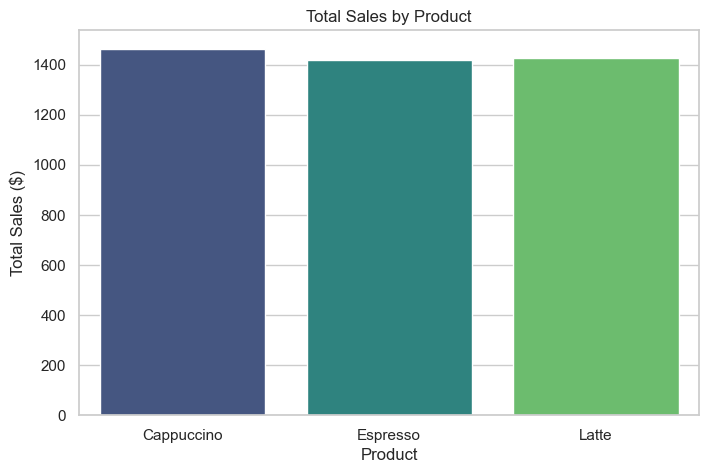

In [11]:
# Bar chart of total sales by product
plt.figure(figsize=(8, 5))
sns.barplot(x=product_sales.index, y=product_sales.values, palette="viridis")
plt.title('Total Sales by Product')
plt.xlabel('Product')
plt.ylabel('Total Sales ($)')
plt.show()

## Line Chart of Sales Over Time

Plot a line chart showing daily sales trends over the time period.

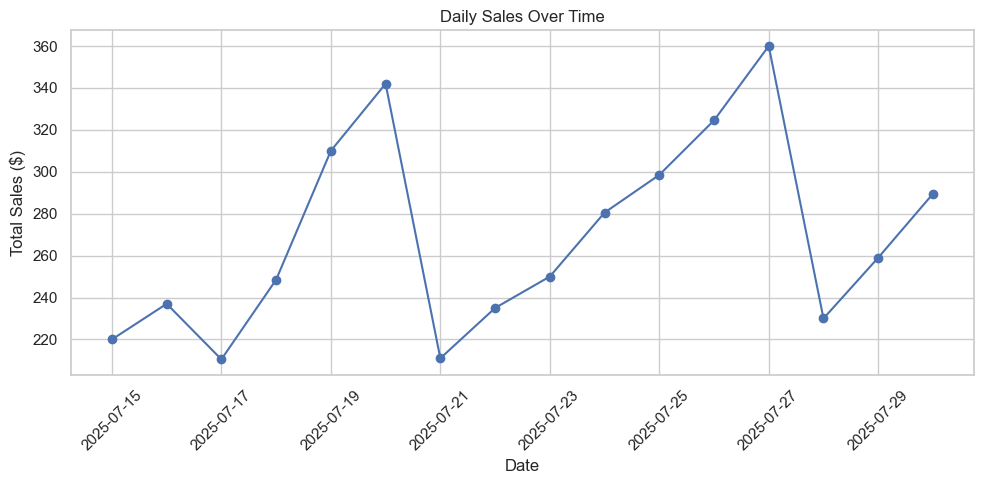

In [12]:
# Line chart of daily sales over time
plt.figure(figsize=(10, 5))
plt.plot(daily_sales.index, daily_sales.values, marker='o')
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()